# Key Input Technique Study
### Author: Sarah

## Structured Analysis
### Import all relevant libraries

In [1]:
!pip3 install pingouin

In [2]:
import pandas as pd
import pingouin as pg
import seaborn as sns
from matplotlib import pyplot as plt

### Read csv file

In [16]:
raw_data_normal_1_1 = pd.read_csv("./normal_marc_aurel_id_1.csv", sep = ';', engine = 'python')
raw_data_normal_1_2 = pd.read_csv("./normal_paola_mastrocola_id_1.csv", sep = ';', engine = 'python')

# raw_data_normal_2_1 = pd.read_csv("./normal_paola_mastrocola_id_2.csv", sep = ';', engine='python')
# raw_data_normal_2_2 = pd.read_csv("./normal_marc_aurel_id_2.csv", sep = ';', engine = 'python')
# raw_data_normal_3_1 = pd.read_csv("./normal_paola_mastrocola_id_3.csv", sep = ';', engine='python')
# raw_data_normal_3_2 = pd.read_csv("./normal_marc_aurel_id_3.csv", sep = ';', engine = 'python')
# raw_data_normal_4_1 = pd.read_csv("./normal_marc_aurel_id_4.csv", sep = ';', engine = 'python')
# raw_data_normal_4_2 = pd.read_csv("./normal_paola_mastrocola_id_4.csv", sep = ';', engine='python')

raw_data_auto_complete_1_1 = pd.read_csv("./auto_complete_paola_mastrocola_id_1.csv", sep = ';', engine = 'python')
raw_data_auto_complete_1_2 = pd.read_csv("./auto_complete_marc_aurel_id_1.csv", sep = ';', engine = 'python')

# raw_data_auto_complete_2_1 = pd.read_csv("./auto_complete_paola_mastrocola_id_2.csv", sep = ';', engine = 'python')
# raw_data_auto_complete_2_2 = pd.read_csv("./auto_complete_marc_aurel_id_2.csv", sep = ';', engine = 'python')
# raw_data_auto_complete_3_1 = pd.read_csv("./auto_complete_marc_aurel_id_3.csv", sep = ';', engine = 'python')
# raw_data_auto_complete_3_2 = pd.read_csv("./auto_complete_paola_mastrocola_id_3.csv", sep = ';', engine = 'python')
# raw_data_auto_complete_4_1 = pd.read_csv("./auto_complete_paola_mastrocola_id_4.csv", sep = ';', engine = 'python')
# raw_data_auto_complete_4_2 = pd.read_csv("./auto_complete_marc_aurel_id_4.csv", sep = ';', engine = 'python')


### Combine the individual tables of the participants and save them

In [18]:
normal_input_technique = pd.concat([
    raw_data_normal_1_1,
    raw_data_normal_1_2,
    # raw_data_normal_2_1,
    # raw_data_normal_2_2,
    # raw_data_normal_3_1,
    # raw_data_normal_3_2,
    # raw_data_normal_4_1,
    # raw_data_normal_4_2
])

novel_input_technique = pd.concat([
    raw_data_auto_complete_1_1,
    raw_data_auto_complete_1_2,
    # raw_data_auto_complete_2_1,
    # raw_data_auto_complete_2_2,
    # raw_data_auto_complete_3_1,
    # raw_data_auto_complete_3_2,
    # raw_data_auto_complete_4_1,
    # raw_data_auto_complete_4_2
])

normal_input_technique.to_csv("normal_input_technique_table.csv", index = False)
normal_input_technique.to_csv("novel_input_technique_table.csv", index = False)

In [19]:
normal_input_technique

,log_type,participant_id,keyboard_type,txt_file,key_limit,key_code,key_value,content,timestamp,word_time_in_s,sentence_time_in_s,words_per_minute
0,key_pressed,1,normal,marc_aurel_selbstbetrachtungen.txt,2,71,G,G,2021-05-18 16:05:00.764843,NaN,NaN,90909.090909
1,key_pressed,1,normal,marc_aurel_selbstbetrachtungen.txt,2,76,l,Gl,2021-05-18 16:05:00.965212,NaN,NaN,119.692987
2,key_pressed,1,normal,marc_aurel_selbstbetrachtungen.txt,2,220,ü,Glü,2021-05-18 16:05:01.428062,NaN,NaN,54.269257
3,key_pressed,1,normal,marc_aurel_selbstbetrachtungen.txt,2,67,c,Glüc,2021-05-18 16:05:01.652044,NaN,NaN,54.094137
4,key_pressed,1,normal,marc_aurel_selbstbetrachtungen.txt,2,75,k,Glück,2021-05-18 16:05:02.011900,NaN,NaN,48.107761
...,...,...,...,...,...,...,...,...,...,...,...,...
350,key_pressed,1,normal,paola_mastrocola_ich_waer_so_gern_ein_pinguin.txt,2,85,u,Oder eben ein Pingu,2021-05-18 16:08:31.059026,NaN,NaN,31.172566
351,key_pressed,1,normal,paola_mastrocola_ich_waer_so_gern_ein_pinguin.txt,2,73,i,Oder eben ein Pingui,2021-05-18 16:08:31.666100,NaN,NaN,31.108004
352,key_pressed,1,normal,paola_mastrocola_ich_waer_so_gern_ein_pinguin.txt,2,78,n,Oder eben ein Pinguin,2021-05-18 16:08:32.114232,NaN,NaN,31.089985
353,word_finished,1,normal,paola_mastrocola_ich_waer_so_gern_ein_pinguin.txt,2,33,!,Oder eben ein Pinguin!,2021-05-18 16:08:32.842675,3.432211,NaN,30.881095


In [20]:
novel_input_technique

,log_type,participant_id,keyboard_type,txt_file,key_limit,key_code,key_value,content,timestamp,word_time_in_s,sentence_time_in_s,words_per_minute
0,key_pressed,1,auto_complete,paola_mastrocola_ich_waer_so_gern_ein_pinguin.txt,2,87,W,W,2021-05-18 16:10:51.594541,NaN,NaN,82758.620690
1,key_pressed,1,auto_complete,paola_mastrocola_ich_waer_so_gern_ein_pinguin.txt,2,196,ä,Wä,2021-05-18 16:10:51.994412,NaN,NaN,59.996250
2,word_finished,1,auto_complete,paola_mastrocola_ich_waer_so_gern_ein_pinguin.txt,2,32,,Wäre,2021-05-18 16:10:53.770152,2.175529,NaN,22.061297
3,key_pressed,1,auto_complete,paola_mastrocola_ich_waer_so_gern_ein_pinguin.txt,2,69,e,Wäre e,2021-05-18 16:10:53.970387,NaN,NaN,25.252621
4,key_pressed,1,auto_complete,paola_mastrocola_ich_waer_so_gern_ein_pinguin.txt,2,73,i,Wäre ei,2021-05-18 16:10:54.089741,NaN,NaN,28.853737
...,...,...,...,...,...,...,...,...,...,...,...,...
169,key_pressed,1,auto_complete,marc_aurel_selbstbetrachtungen.txt,2,70,f,Ich zürne dir deswegen nicht; nur geh bald f,2021-05-18 16:15:03.841139,NaN,NaN,24.357789
170,key_pressed,1,auto_complete,marc_aurel_selbstbetrachtungen.txt,2,79,o,Ich zürne dir deswegen nicht; nur geh bald fo,2021-05-18 16:15:04.088433,NaN,NaN,24.414607
171,key_pressed,1,auto_complete,marc_aurel_selbstbetrachtungen.txt,2,82,r,Ich zürne dir deswegen nicht; nur geh bald for,2021-05-18 16:15:04.370153,NaN,NaN,24.463172
172,word_finished,1,auto_complete,marc_aurel_selbstbetrachtungen.txt,2,46,.,Ich zürne dir deswegen nicht; nur geh bald fort.,2021-05-18 16:15:05.336650,1.495524,NaN,24.353774


In [21]:
# whole data set
input_technique_table = pd.concat([
    normal_input_technique,
    novel_input_technique
])

input_technique_table

,log_type,participant_id,keyboard_type,txt_file,key_limit,key_code,key_value,content,timestamp,word_time_in_s,sentence_time_in_s,words_per_minute
0,key_pressed,1,normal,marc_aurel_selbstbetrachtungen.txt,2,71,G,G,2021-05-18 16:05:00.764843,NaN,NaN,90909.090909
1,key_pressed,1,normal,marc_aurel_selbstbetrachtungen.txt,2,76,l,Gl,2021-05-18 16:05:00.965212,NaN,NaN,119.692987
2,key_pressed,1,normal,marc_aurel_selbstbetrachtungen.txt,2,220,ü,Glü,2021-05-18 16:05:01.428062,NaN,NaN,54.269257
3,key_pressed,1,normal,marc_aurel_selbstbetrachtungen.txt,2,67,c,Glüc,2021-05-18 16:05:01.652044,NaN,NaN,54.094137
4,key_pressed,1,normal,marc_aurel_selbstbetrachtungen.txt,2,75,k,Glück,2021-05-18 16:05:02.011900,NaN,NaN,48.107761
...,...,...,...,...,...,...,...,...,...,...,...,...
169,key_pressed,1,auto_complete,marc_aurel_selbstbetrachtungen.txt,2,70,f,Ich zürne dir deswegen nicht; nur geh bald f,2021-05-18 16:15:03.841139,NaN,NaN,24.357789
170,key_pressed,1,auto_complete,marc_aurel_selbstbetrachtungen.txt,2,79,o,Ich zürne dir deswegen nicht; nur geh bald fo,2021-05-18 16:15:04.088433,NaN,NaN,24.414607
171,key_pressed,1,auto_complete,marc_aurel_selbstbetrachtungen.txt,2,82,r,Ich zürne dir deswegen nicht; nur geh bald for,2021-05-18 16:15:04.370153,NaN,NaN,24.463172
172,word_finished,1,auto_complete,marc_aurel_selbstbetrachtungen.txt,2,46,.,Ich zürne dir deswegen nicht; nur geh bald fort.,2021-05-18 16:15:05.336650,1.495524,NaN,24.353774


### Filter the data with relevant columns for analysis of task completion time and save the result

In [22]:
filtered_data = input_technique_table[
    ["log_type", "participant_id", "keyboard_type", "content", "sentence_time_in_s", "words_per_minute"]]

filtered_data.to_csv("filtered_data.csv", index=False)

filtered_data

,log_type,participant_id,keyboard_type,content,sentence_time_in_s,words_per_minute
0,key_pressed,1,normal,G,NaN,90909.090909
1,key_pressed,1,normal,Gl,NaN,119.692987
2,key_pressed,1,normal,Glü,NaN,54.269257
3,key_pressed,1,normal,Glüc,NaN,54.094137
4,key_pressed,1,normal,Glück,NaN,48.107761
...,...,...,...,...,...,...
169,key_pressed,1,auto_complete,Ich zürne dir deswegen nicht; nur geh bald f,NaN,24.357789
170,key_pressed,1,auto_complete,Ich zürne dir deswegen nicht; nur geh bald fo,NaN,24.414607
171,key_pressed,1,auto_complete,Ich zürne dir deswegen nicht; nur geh bald for,NaN,24.463172
172,word_finished,1,auto_complete,Ich zürne dir deswegen nicht; nur geh bald fort.,NaN,24.353774


In [23]:
words_per_minute = filtered_data[filtered_data["log_type"] == "test_finished"]
words_per_minute = words_per_minute[["log_type", "participant_id", "keyboard_type", "content", "words_per_minute"]]
words_per_minute

,log_type,participant_id,keyboard_type,content,words_per_minute
278,test_finished,1,normal,Ich zürne dir deswegen nicht; nur geh bald fort.,32.955710
354,test_finished,1,normal,Oder eben ein Pinguin!,30.627758
232,test_finished,1,auto_complete,Oder eben ein Pinguin!,25.677784
173,test_finished,1,auto_complete,Ich zürne dir deswegen nicht; nur geh bald fort.,24.278825


In [24]:
time_per_sentence = filtered_data[(filtered_data["log_type"] == "sentence_finished") 
                                  | (filtered_data["log_type"] == "test_finished")]
time_per_sentence = time_per_sentence[["log_type", "participant_id", "keyboard_type", "content", "sentence_time_in_s"]]
time_per_sentence

,log_type,participant_id,keyboard_type,content,sentence_time_in_s
61,sentence_finished,1,normal,Glücklich sein heißt einene guten Genius haben...,14.631612
100,sentence_finished,1,normal,"Was amchst du also hier, Einbildung?",11.387144
180,sentence_finished,1,normal,"GEh, um der Götter willen, wie du gekommen bis...",19.719190
227,sentence_finished,1,normal,Du bist gekommen nach deiner alten Gewohnheit.,12.502374
278,test_finished,1,normal,Ich zürne dir deswegen nicht; nur geh bald fort.,17.610172
45,sentence_finished,1,normal,Wäre ein Pinguin vielleicht die bessere Ente?,14.757848
116,sentence_finished,1,normal,"Als ihr Mann für sie das Brüten übernimmt, bes...",20.087362
202,sentence_finished,1,normal,"in die Welt auszuziehen und etwas zu werden, w...",23.288856
277,sentence_finished,1,normal,"Denns chließlich ist sie nur eine Ente, und wa...",23.410542
315,sentence_finished,1,normal,Da wäre sie doch lieber ein Rabe!,11.544720


## Statistics for all tables

In [25]:
input_technique_table.describe()  # total

,participant_id,key_limit,key_code,word_time_in_s,sentence_time_in_s,words_per_minute
count,1041.0,1041.0,1.041000e+03,218.000000,25.000000,1041.000000
mean,1.0,2.0,7.897702e+05,1.361107,16.344521,356.978389
std,0.0,0.0,3.554922e+06,0.836880,7.127810,5244.920394
min,1.0,2.0,3.200000e+01,0.289383,4.040901,20.042294
25%,1.0,2.0,6.500000e+01,0.727961,11.544720,27.678072
50%,1.0,2.0,7.100000e+01,1.134420,15.599650,32.550168
75%,1.0,2.0,7.900000e+01,1.798891,20.087362,34.525972
max,1.0,2.0,1.677724e+07,4.552450,33.392906,90909.090909


In [26]:
normal_input_technique.describe()  # normal input technique

,participant_id,key_limit,key_code,word_time_in_s,sentence_time_in_s,words_per_minute
count,634.0,634.0,6.340000e+02,107.000000,12.000000,634.000000
mean,1.0,2.0,4.763927e+05,1.271988,15.017132,320.723075
std,0.0,0.0,2.788678e+06,0.866926,6.078147,5080.816041
min,1.0,2.0,3.200000e+01,0.289383,4.040901,26.046551
25%,1.0,2.0,6.700000e+01,0.603741,11.505326,32.642157
50%,1.0,2.0,7.200000e+01,1.029632,14.694730,33.730097
75%,1.0,2.0,7.900000e+01,1.660250,19.811233,35.804270
max,1.0,2.0,1.677722e+07,4.552450,23.410542,90909.090909


In [27]:
novel_input_technique.describe()  # novel input technique

,participant_id,key_limit,key_code,word_time_in_s,sentence_time_in_s,words_per_minute
count,407.0,407.0,4.070000e+02,111.000000,13.000000,407.000000
mean,1.0,2.0,1.277931e+06,1.447015,17.569804,413.454727
std,0.0,0.0,4.455875e+06,0.801392,8.022328,5496.690947
min,1.0,2.0,3.200000e+01,0.295707,6.765840,20.042294
25%,1.0,2.0,3.850000e+01,0.920293,12.792555,25.392470
50%,1.0,2.0,6.900000e+01,1.221530,17.657091,26.757387
75%,1.0,2.0,7.800000e+01,1.823794,20.111887,28.352055
max,1.0,2.0,1.677724e+07,4.118841,33.392906,82758.620690


## Visualizations

### Scatter plots for task completion time

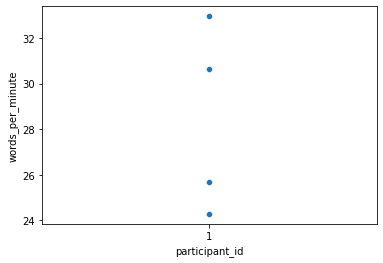

In [30]:
scatter_plot_ids = sns.scatterplot(
    data = words_per_minute,
    x = "participant_id",
    y = "words_per_minute",
)
scatter_plot_ids.set(xlabel = "participant_id", ylabel = "words_per_minute", xticks = [1])
plt.show()

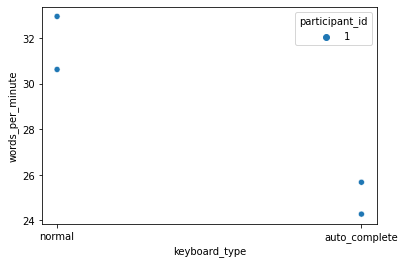

In [38]:
scatter_plot_con = sns.scatterplot(
    data = words_per_minute,
    x = "keyboard_type",
    y = "words_per_minute",
    hue = "participant_id"
)
scatter_plot_con.set(xlabel = "keyboard_type", ylabel = "words_per_minute")
plt.show()

### Swarm plots for task completion time

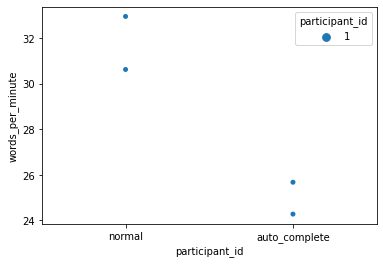

In [37]:
swarm_plot_con_normal = sns.swarmplot(
    data = words_per_minute,
    y = "words_per_minute",
    x = "keyboard_type",
    hue = "participant_id"
) 
swarm_plot_con_normal.set(xlabel = "participant_id", ylabel = "words_per_minute")

plt.show()

### Boxplots for task completion time

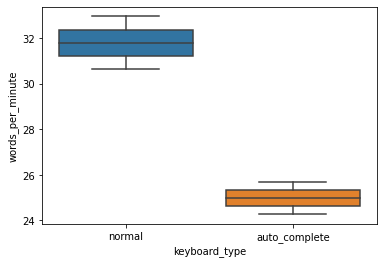

In [39]:
box_plot_con = sns.boxplot(
    data = words_per_minute,
    x = "keyboard_type",
    y = "words_per_minute"
)

box_plot_con.set(xlabel = "keyboard_type", ylabel = "words_per_minute")

plt.show()

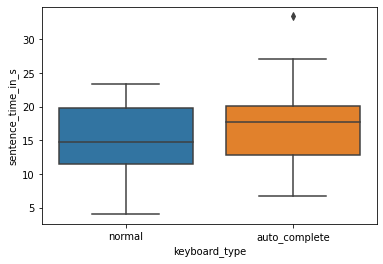

In [42]:
box_plot_time = sns.boxplot(
    data = time_per_sentence,
    x = "keyboard_type",
    y = "sentence_time_in_s"
)

box_plot_time.set(xlabel = "keyboard_type", ylabel = "sentence_time_in_s")
plt.show()

## T-test

__Tests for variance homogeneity and normal distribution for words per minute__

In [43]:
pg.homoscedasticity(data = input_technique_table, dv = "words_per_minute", group = "keyboard_type", method = "bartlett")

,T,pval,equal_var
bartlett,3.091171,0.078718,True


In [44]:
pg.normality(data = input_technique_table, dv = "words_per_minute", group = "keyboard_type")

,W,pval,normal
normal,0.030262,0.000000e+00,False
auto_complete,0.043211,1.012466e-40,False


__There is no normal distribution, so according to Field (2009) the non-parametric Welch-Anova test is used.__

Source: 
Field, A. P. (2009). Discovering statistics using SPSS: And sex, drugs and rock „n“ roll (3rd ed). SAGE Publications.

In [47]:
pg.welch_anova(data = input_technique_table, dv = "words_per_minute", between = "keyboard_type")

,Source,ddof1,ddof2,F,p-unc,np2
0,keyboard_type,1,816.053189,0.074806,0.784532,0.000075


__Tests for variance homogeneity and normal distribution for time for a sentence__

In [45]:
pg.homoscedasticity(data = input_technique_table, dv = "sentence_time_in_s", group = "keyboard_type", method = "bartlett")

,T,pval,equal_var
bartlett,NaN,NaN,False


In [46]:
pg.normality(data = input_technique_table, dv = "sentence_time_in_s", group = "keyboard_type")

,W,pval,normal
normal,0.960923,0.796918,True
auto_complete,0.954844,0.673117,True


__There is no normal distribution, so according to Field (2009) the non-parametric Welch-Anova test is used.__

Source: 
Field, A. P. (2009). Discovering statistics using SPSS: And sex, drugs and rock „n“ roll (3rd ed). SAGE Publications.

In [48]:
pg.welch_anova(data = input_technique_table, dv = "sentence_time_in_s", between = "keyboard_type")

,Source,ddof1,ddof2,F,p-unc,np2
0,keyboard_type,1,22.199921,0.811549,0.377332,0.033347
